# Exemplo do uso dos pesos treinados

## Definição dos endereços

In [1]:
# Dados para treinamento
train_data_dir = '/home/notebooks/rnpi-all-iamaron-master/src/datasets/FireIds'

# Dados para teste
test_data_dir = '/home/notebooks/rnpi-all-iamaron-master/src/datasets/Validation'

# Modelos
models_dir = '../models/'

# Nome da rede para detecção de incêndio
fire_vgg16_name = 'fire_vgg16_weights.h5'

## Bibliotecas utilizada na predição

In [2]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation
from keras.optimizers import SGD
import urllib, cv2, numpy as np
from keras.preprocessing.image import load_img, img_to_array

Using Theano backend.


## Função para carregar os pesos

In [3]:
def Fire_net(weights_path, img_width, img_height):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3, img_width, img_height)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

## Função utilizada na classificação

In [4]:
def predict_from_path(image_path):
    img = np.empty((1, 3, img_width, img_height), np.uint8)
    img_loaded = load_img(image_path, grayscale=False, target_size=(img_width, img_height))
    img[0] = img_to_array(img_loaded, dim_ordering='th')

    out = model.predict(img)
    predict = np.argmax(out)

    if(predict == 1):
        return "Fogo!"
    else:
        return "Não tem fogo..."

## Inicialização dos parâmetros para classificação

In [5]:
img_width, img_height = 85, 128
model_name = models_dir+fire_vgg16_name

model = Fire_net(model_name,img_width, img_height)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

## Carregamento da imagem e chamada da função

In [6]:
# Plota imagem
import matplotlib.pyplot as plot
%matplotlib inline

def plot_from_path(image_path):
    img_plt = plot.imread(image_path)
    plot.imshow(img_plt)

Fogo!


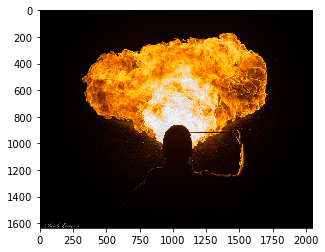

In [7]:
import os

# Seleciona a pasta
fire_dataset = True
if(fire_dataset):
    path = test_data_dir+'/fire/'
    files = os.listdir(path)
else:
    path = test_data_dir+'/not_fire/'
    files = os.listdir(fire_path)

image_path = path+files[4]
print predict_from_path(image_path)
plot_from_path(image_path)

## Teste utilizando a classe

Este teste utiliza o mesmo código acima no documento /api/classifier.py

In [9]:
import sys
sys.path.append('../')
from classifier import predict_from_path
from classifier import predict_from_url
from classifier import predict_from_image

Não tem fogo...


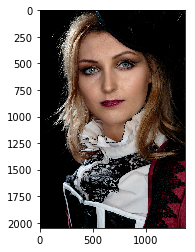

In [11]:
import os

# Seleciona a pasta
fire_dataset = False
if(fire_dataset):
    path = test_data_dir+'/fire/'
    files = os.listdir(path)
else:
    path = test_data_dir+'/not_fire/'
    files = os.listdir(path)

image_path = path+files[13]
print predict_from_path(image_path)

# Plota imagem
import matplotlib.pyplot as plot
%matplotlib inline

img_plt = plot.imread(image_path)
plot.imshow(img_plt)

# Teste com imagens do Google

In [14]:
def url_to_image(url, img_width, img_height):
    resp = urllib.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
    return cv2.resize(image, (img_height, img_width))

def plot_from_url(image_url):
    image = url_to_image(image_url, img_width, img_height)
    plot.imshow(image)

In [15]:
def predict_from_url(image_url):
    image = url_to_image(image_url, img_width, img_height)
    img = np.empty((1, 3, img_width, img_height), np.uint8)
    img[0] = img_to_array(image, dim_ordering='th')

    out = model.predict(img)
    predict = np.argmax(out)

    if(predict == 1):
        return "Fogo!"
    else:
        return "Não tem fogo..."

Fogo!


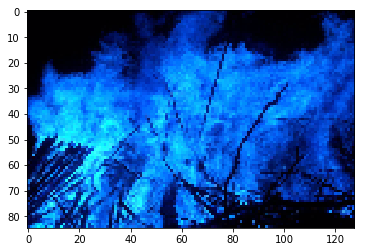

In [16]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/3/36/Large_bonfire.jpg'
img_width, img_height = 85, 128

print predict_from_url(image_url)
plot_from_url(image_url)

Fogo!


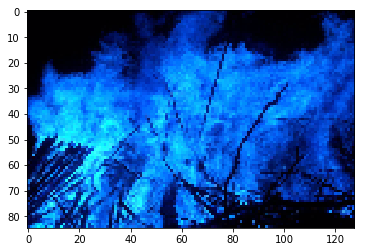

In [18]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/3/36/Large_bonfire.jpg'

print predict_from_url(image_url)
plot_from_url(image_url)